# Data Science Challenge

In [1]:
#Libraries
import pandas as pd, numpy as np
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Unique id
`Daily Time Spent on Site` | Consumer time spent on site (in minutes)
`Age` | Consumer age (in years)
`Area Income` | Avg. Income of geographical area of consumer (in US $$)
`Daily Internet Usage` | Avg. minutes a day consumer is on the internet
`Ad Topic Line` | Headline of the advertisement
`gender` | Gender of the consumer
`Country` | Country of consumer
`Timestamp` | Timestamp at which consumer clicked on Ad or closed window (YYYY-MM-DD HH:MM:SS)
`Clicked` | Whether a consumer clicked on the advert or not (0: No ,1: Yes)

## Data Wrangling & Visualization

In [2]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [3]:
data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0
1,1201,2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0
2,1202,2016-01-01 05:31:22,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0
3,1203,2016-01-01 08:27:06,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0
4,1204,2016-01-01 15:14:24,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1


In [4]:
#Explore columns
data.columns

Index(['id', 'Timestamp', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'gender', 'Country',
       'Clicked'],
      dtype='object')

In [5]:
#Description
data.describe()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked
count,1000.000000,1000.000000,1000.000000,775.000000,1000.000000,1000.000000,1000.000000
mean,1699.500000,65.120650,35.816000,55343.014555,179.592310,0.474000,0.503000
std,288.819436,15.781456,8.782669,13182.578667,43.735785,0.499573,0.500241
min,1200.000000,32.600000,19.000000,14548.060000,105.000000,0.000000,0.000000
25%,1449.750000,51.450000,29.000000,48270.620000,137.885000,0.000000,0.000000
50%,1699.500000,68.390000,35.000000,57737.510000,182.425000,0.000000,1.000000
75%,1949.250000,78.572500,41.250000,65207.185000,217.707500,1.000000,1.000000
max,2199.000000,91.370000,61.000000,79484.800000,269.960000,1.000000,1.000000


### Preprocessing

In [6]:
# Explore values types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
id                          1000 non-null int64
Timestamp                   1000 non-null object
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 775 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
gender                      1000 non-null int64
Country                     1000 non-null object
Clicked                     1000 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 78.2+ KB


In [7]:
# Remove rows having missing values.
data.dropna(inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 999
Data columns (total 10 columns):
id                          775 non-null int64
Timestamp                   775 non-null object
Daily Time Spent on Site    775 non-null float64
Age                         775 non-null int64
Area Income                 775 non-null float64
Daily Internet Usage        775 non-null float64
Ad Topic Line               775 non-null object
gender                      775 non-null int64
Country                     775 non-null object
Clicked                     775 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 66.6+ KB


In [9]:
# Convert timestamps to unix format

# Create function to convert the format 
def timestamp_to_unix(time_stamp):
    import time
    import datetime
    
    reformat = datetime.datetime.strptime(time_stamp,'%Y-%m-%d %H:%M:%S')
    unix_format = int(datetime.datetime.timestamp(reformat))
    
    return(unix_format)

In [10]:
data['Timestamp'] = data['Timestamp'].apply(timestamp_to_unix)
data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,1451616730,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0
1,1201,1451619335,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0
2,1202,1451626282,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0
3,1203,1451636826,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0
4,1204,1451661264,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1


In [11]:
# Replace categorical values in columns 'Ad Topic Line' and 'Country' with numerical.

# Firstly, create encoder mapping. Both train and test data to be used for mapping creation.
# Create a list of possible values from both columns.

values_list = list(dict.fromkeys(
    data['Ad Topic Line'].to_list() + 
    data['Country'].to_list()))

In [12]:
# Secondly, fit the label encoder for each column.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(values_list)

LabelEncoder()

In [13]:
# Thirdly, encode categorical values to numeric in both TRAIN and TEST data.
data['Ad Topic Line'] = le.transform(data['Ad Topic Line'])
data['Country'] = le.transform(data['Country'])

In [14]:
data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,1451616730,80.67,34,58909.36,239.76,788,0,643,0
1,1201,1451619335,68.01,25,68357.96,188.32,17,1,14,0
2,1202,1451626282,80.94,36,60803.00,239.94,803,0,71,0
3,1203,1451636826,78.77,28,63497.62,211.83,695,0,368,0
4,1204,1451661264,36.56,29,42838.29,195.89,881,0,914,1


In [15]:
# Convert columns 'Ad Topic Line' and 'Country' to categorical.
data['Ad Topic Line'] = data['Ad Topic Line'].astype('category')
data['Country'] = data['Country'].astype('category')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 999
Data columns (total 10 columns):
id                          775 non-null int64
Timestamp                   775 non-null int64
Daily Time Spent on Site    775 non-null float64
Age                         775 non-null int64
Area Income                 775 non-null float64
Daily Internet Usage        775 non-null float64
Ad Topic Line               775 non-null category
gender                      775 non-null int64
Country                     775 non-null category
Clicked                     775 non-null int64
dtypes: category(2), float64(3), int64(5)
memory usage: 95.4 KB


## Visualization, Modeling, Machine Learning

Predict which users might click a particular advertisement.
Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on the basis of accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [17]:
# Preparing the data for training.
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:9]
y = data.iloc[:, 9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2020)

In [18]:
# Model training
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [19]:
from sklearn import tree
tree.plot_tree(clf)

[Text(209.09803921568627, 351.11999999999995, 'X[5] <= 177.505\ngini = 0.5\nsamples = 519\nvalue = [263, 256]'),
 Text(106.98039215686273, 314.15999999999997, 'X[2] <= 73.915\ngini = 0.139\nsamples = 240\nvalue = [18, 222]'),
 Text(58.35294117647058, 277.2, 'X[4] <= 77326.773\ngini = 0.019\nsamples = 211\nvalue = [2, 209]'),
 Text(38.90196078431372, 240.23999999999998, 'X[2] <= 71.365\ngini = 0.009\nsamples = 210\nvalue = [1, 209]'),
 Text(19.45098039215686, 203.28, 'gini = 0.0\nsamples = 205\nvalue = [0, 205]'),
 Text(58.35294117647058, 203.28, 'X[0] <= 2087.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(38.90196078431372, 166.32, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(77.80392156862744, 166.32, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(77.80392156862744, 240.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(155.6078431372549, 277.2, 'X[5] <= 160.33\ngini = 0.495\nsamples = 29\nvalue = [16, 13]'),
 Text(116.70588235294116, 240.23999999999998, '

In [20]:
y_pred = clf.predict(X_test)

In [21]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.921875



**Describe the most important features in the model to a management audience.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


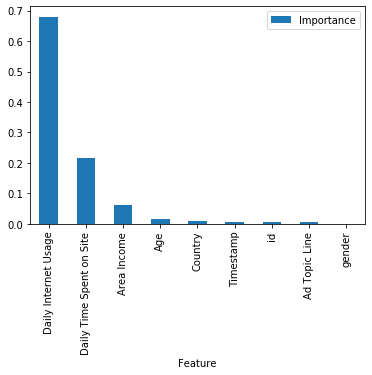

In [23]:
# Extract the features importance from the trained model.
importance = clf.feature_importances_

# Create the table with features names.
features_comparison = list(zip(data.columns, importance))
features_comparison = pd.DataFrame(features_comparison, columns=['Feature','Importance'])
features_comparison.sort_values(by='Importance', ascending=False, inplace=True)

# Visualize
features_comparison.plot(kind='bar',x='Feature',y='Importance')

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict whether a consumer clicked on an ad or not. Submit a CSV file with a header row and one row per test entry. 
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **Clicked**

In [24]:
submission_df = list(zip(X_test.id.to_list(), list(y_pred)))
submission_df = pd.DataFrame(submission_df, columns=['id','Clicked'])
submission_df.head()

,id,Clicked
0,1760,0
1,1744,1
2,1730,0
3,1646,0
4,1632,1


In [25]:
#Submission
submission_df.to_csv('submissions.csv',index=False)